In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input,Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
print("shape of X_train",x_train.shape)
x_train, x_test = x_train/255.0, x_test/255.0
print("shape of X_train",x_train.shape)

shape of X_train (60000, 28, 28)
shape of X_train (60000, 28, 28)


In [7]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
k = len(set(y_train))
print(k)

10


In [0]:
 i = Input(shape=x_train[0].shape)
 x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
 x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
 x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
 x = Flatten()(x)
 x = Dropout(0.2)(x)
 x = Dense(512,activation='relu')(x)
 x = Dense(k, activation='softmax')(x)

 model = Model(i,x)




In [10]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.5096 - accuracy: 0.8102 - val_loss: 0.3939 - val_accuracy: 0.8537
Epoch 2/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3567 - accuracy: 0.8666 - val_loss: 0.3468 - val_accuracy: 0.8726
Epoch 3/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3050 - accuracy: 0.8852 - val_loss: 0.3198 - val_accuracy: 0.8809
Epoch 4/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2728 - accuracy: 0.8980 - val_loss: 0.3122 - val_accuracy: 0.8872
Epoch 5/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2474 - accuracy: 0.9075 - val_loss: 0.3052 - val_accuracy: 0.8902
Epoch 6/15
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2252 - accuracy: 0.9142 - val_loss: 0.2890 - val_accuracy: 0.8965
Epoch 7/15
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2027 - accuracy: 0.9237 - val_loss: 0.2995 -

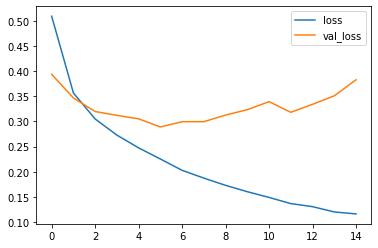

In [12]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

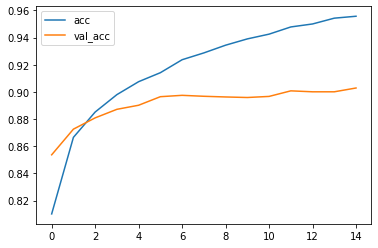

In [13]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()